# __Tabular Data Analysis Presentation__

This notebook presents the analysis of tabular data using dimensionality reduction techniques (PCA, t-SNE, UMAP) and clustering methods. We evaluate the clustering performance using Adjusted Rand Index (ARI).

**Goals:**
- Visualize the structure of the data
- Compare dimensionality reduction techniques
- Perform clustering
- Evaluate the quality of clustering

## __Step 1: Data Cleaning and Problem Analysis__

In [4]:
import pandas as pd #for working with tables (DataFrame)
import matplotlib.pyplot as plt  #for building classic graphs
import seaborn as sns
import umap #for reducing dimensionality
import plotly.express as px #for interactive graphs
from sklearn.decomposition import PCA # PCA, TSNE dimensionality reduction methods
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler #feature scaling
from sklearn.cluster import KMeans #clustering algorithm
from sklearn.metrics import adjusted_rand_score #metric for assessing clustering quality

import plotly.io as pio  # Add missing import for pio
pio.renderers.default = 'browser' # Uses the browser to display graphs

pio.renderers.default = 'browser'

# Specify the path to the file
file_path = "../data/raw/olx_cars.csv"

df = pd.read_csv(file_path)
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         316 non-null    object 
 1   price_pln     316 non-null    int64  
 2   brand         0 non-null      float64
 3   model         316 non-null    object 
 4   year          316 non-null    int64  
 5   mileage_km    316 non-null    int64  
 6   fuel          316 non-null    object 
 7   transmission  316 non-null    object 
 8   image_url     316 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 22.3+ KB


(None,
                                                title  price_pln  brand  \
 0  Honda CRV 2,0 Execiutive,tempomat aktywny ,pan...      28000    NaN   
 1  Honda CRV 2,0 Execiutive,tempomat aktywny ,pan...      28000    NaN   
 2  Skoda Octavia VRS 2.0 Diesel Avtomat Nowy samo...      68000    NaN   
 3  Skoda Octavia VRS 2.0 Diesel Avtomat Nowy samo...      68000    NaN   
 4  MAZDA 6 2.2 Skyaktiv-D 2014 – Stan SALONOWY | ...      38500    NaN   
 
      model  year  mileage_km    fuel  transmission  \
 0     CR-V  2007      304000     LPG      Manualna   
 1     CR-V  2007      304000     LPG      Manualna   
 2  Octavia  2011        5000  Diesel  Automatyczna   
 3  Octavia  2011        5000  Diesel  Automatyczna   
 4        6  2014      217000  Diesel      Manualna   
 
                                            image_url  
 0  https://ireland.apollo.olxcdn.com:443/v1/files...  
 1  https://ireland.apollo.olxcdn.com:443/v1/files...  
 2  https://ireland.apollo.olxcdn.com:443

In [5]:
#problems
#1)Completely empty brand column
#2)Repeat — there are duplicate rows in the dataset.
#3)The model column contains very short values ​​(for example, just "60"), possibly incomplete names.
duplicates = df.duplicated().sum()
print(duplicates)


163


In [6]:
#1)Remove duplicates(128 duplicates).
df_cleaned = df.drop_duplicates()
duplicates = df_cleaned.duplicated().sum()
print(duplicates)

#Remove the brand column
df_cleaned = df_cleaned.drop(columns=['brand'])

# One-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['fuel', 'transmission'], drop_first=True)

df_encoded.shape, df_encoded.columns[:10]
df_encoded


0


,title,price_pln,model,year,mileage_km,image_url,fuel_CNG i Hybryda,fuel_Diesel,fuel_Elektryczny,fuel_Hybryda Plug-in,fuel_LPG,transmission_Manualna
0,"Honda CRV 2,0 Execiutive,tempomat aktywny ,pan...",28000,CR-V,2007,304000,https://ireland.apollo.olxcdn.com:443/v1/files...,False,False,False,False,True,True
2,Skoda Octavia VRS 2.0 Diesel Avtomat Nowy samo...,68000,Octavia,2011,5000,https://ireland.apollo.olxcdn.com:443/v1/files...,False,True,False,False,False,False
4,MAZDA 6 2.2 Skyaktiv-D 2014 – Stan SALONOWY | ...,38500,6,2014,217000,https://ireland.apollo.olxcdn.com:443/v1/files...,False,True,False,False,False,True
6,Skoda Octavia VRS 2.0 Diesel Avtomat Nowy samo...,68000,Octavia,2011,5000,https://ireland.apollo.olxcdn.com:443/v1/files...,False,True,False,False,False,False
8,Sprzedam Kia Sorento 2.5crdi 2008 r 4x4,17900,Sorento,2008,283409,https://ireland.apollo.olxcdn.com:443/v1/files...,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
306,Ford F150 RAPTOR,250000,F150,2017,122000,https://ireland.apollo.olxcdn.com:443/v1/files...,False,False,False,False,False,False
308,Samochód Alfa Romeo Mito,4500,Mito,2012,211000,https://ireland.apollo.olxcdn.com:443/v1/files...,False,True,False,False,False,True
310,Sprzedam Audi A6C7,107000,A6,2018,160000,https://ireland.apollo.olxcdn.com:443/v1/files...,False,True,False,False,False,False
312,Sprzedam Subaru Forester,26000,Forester,2008,186000,https://ireland.apollo.olxcdn.com:443/v1/files...,False,False,False,False,True,False


## __Step 2: Data Visualization__

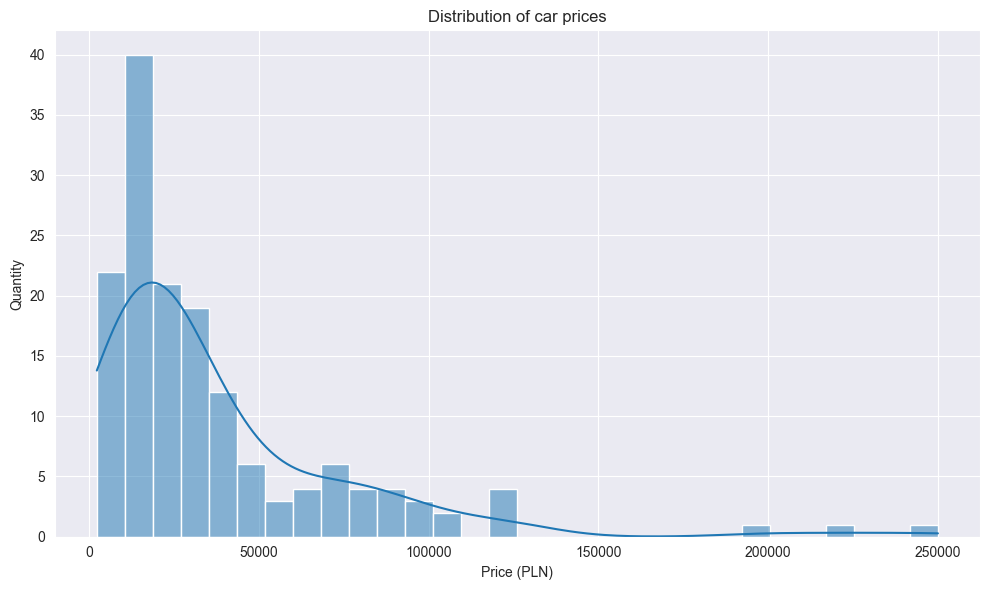

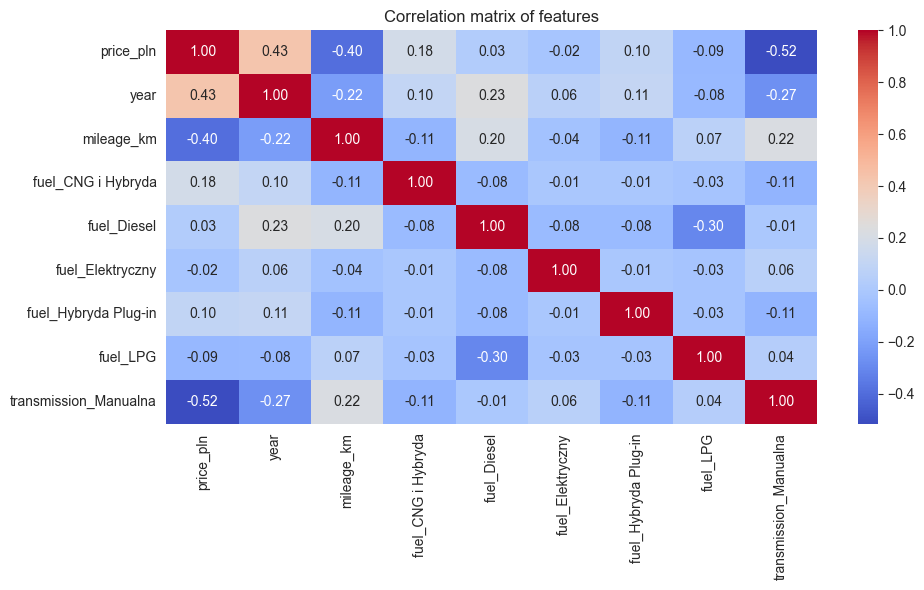

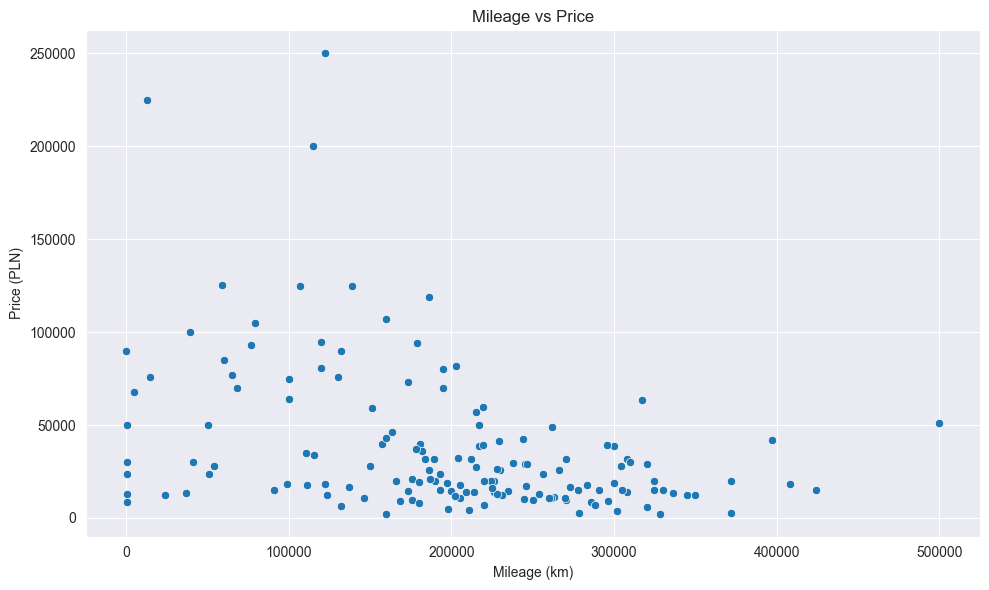

In [7]:

# Increase the size of the graphs
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Histogram of price distribution
plt.subplot(1, 1, 1)
sns.histplot(df_encoded['price_pln'], bins=30, kde=True)
plt.title('Distribution of car prices')
plt.xlabel('Price (PLN)')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

# 2. Corellation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix of features')
plt.tight_layout()
plt.show()

# 3. Scatter plot
sns.scatterplot(data=df_encoded, x='mileage_km', y='price_pln')
plt.title('Mileage vs Price')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (PLN)')
plt.tight_layout()
plt.show()


# __Step3:Dimensionality Reduction using PCA and t-SNE or UMAP__

In [9]:
# Select the category column to use as a label for visualization
category_column = 'fuel_CNG i Hybryda'

# Split features (X) and labels (y)
features = df_encoded.drop(category_column, axis=1)
labels = df_encoded[category_column]

# Keep only numeric columns to apply dimensionality reduction
features_numeric = features.select_dtypes(include=['float64', 'int64'])

# Standardize the features (mean = 0, std = 1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_numeric)

# Apply PCA - linear dimensionality reduction to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Apply t-SNE - non-linear technique good for visualizing clusters
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_scaled)

# Apply UMAP - modern method preserving both local and global structures
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(features_scaled)

# Create DataFrames for visualization, adding the category as a color label
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Category'] = labels

tsne_df = pd.DataFrame(tsne_result, columns=['tSNE1', 'tSNE2'])
tsne_df['Category'] = labels

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['Category'] = labels

# Plot the embeddings using Plotly (interactive scatter plots)

# PCA
fig_pca = px.scatter(pca_df, x='PCA1', y='PCA2', color='Category', title="PCA Reduced Embeddings")
fig_pca.show()

# t-SNE
fig_tsne = px.scatter(tsne_df, x='tSNE1', y='tSNE2', color='Category', title="t-SNE Reduced Embeddings")
fig_tsne.show()

# UMAP
fig_umap = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='Category', title="UMAP Reduced Embeddings")
fig_umap.show()



/Users/zhaniko/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhaniko/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



## __Step 4:Clustering the Data__

In [10]:
# Let's assume df_encoded is the preprocessed DataFrame
# Define the column that will be used as the category/label
category_column = 'fuel_CNG i Hybryda'  # You can change this to any other column

# Separate features (X) and labels (y)
features = df_encoded.drop(category_column, axis=1)
labels = df_encoded[category_column]

# Convert categorical variables into numeric (one-hot encoding)
features_encoded = pd.get_dummies(features)

# Scale the features to standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

# Dimensionality reduction using UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(features_scaled)

# Create a DataFrame for visualization
umap_df = pd.DataFrame(umap_embeddings, columns=['UMAP1', 'UMAP2'])
umap_df['Category'] = labels

# Visualize the result using Plotly
fig = px.scatter(umap_df, x='UMAP1', y='UMAP2', color='Category', title="UMAP Reduced Embeddings")
fig.show()

# Apply clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

# Evaluate clustering quality with Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari}")


/Users/zhaniko/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhaniko/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Adjusted Rand Index (ARI): -0.011245079572754649


/Users/zhaniko/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zhaniko/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Adjusted Rand Index (ARI) для оценки качества кластеризации: -0.011


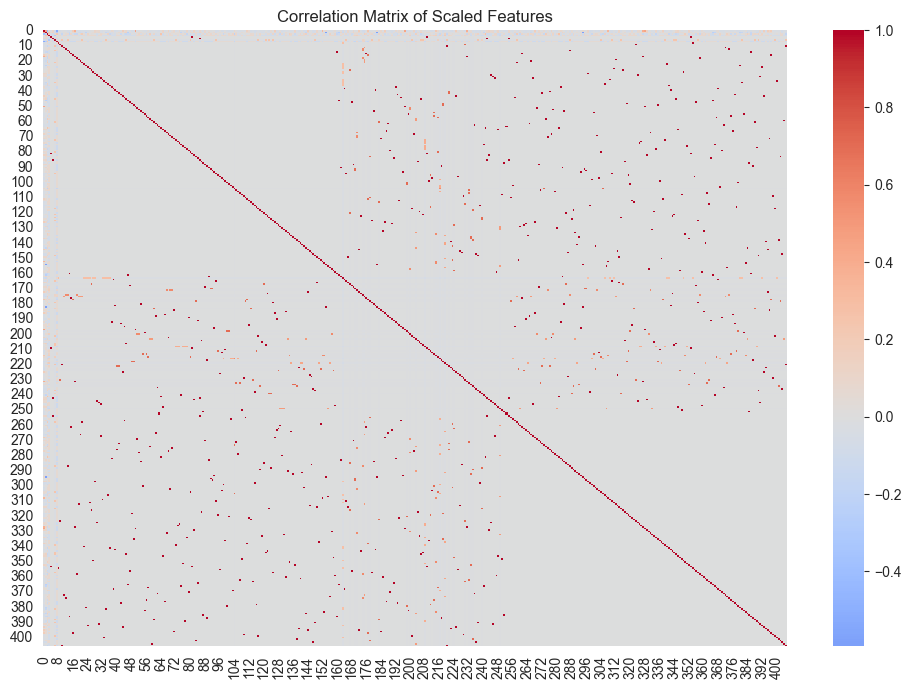

In [17]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

category_column = 'fuel_CNG i Hybryda'

features = df_encoded.drop(category_column, axis=1)
labels = df_encoded[category_column]

features_encoded = pd.get_dummies(features)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_encoded)

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(features_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

umap_df['Cluster'] = cluster_labels.astype(str)

fig_clusters = px.scatter(umap_df, x='UMAP1', y='UMAP2',
                         color='Cluster',
                         title="KMeans Clustering (3 clusters) on UMAP Projection",
                         hover_name=umap_df.index,
                         width=800, height=600)
fig_clusters.update_traces(marker=dict(size=8, opacity=0.7))
fig_clusters.show()

ari = adjusted_rand_score(labels, cluster_labels)
print(f"Adjusted Rand Index (ARI) для оценки качества кластеризации: {ari:.3f}")

plt.figure(figsize=(12, 8))
corr_matrix = pd.DataFrame(features_scaled).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Scaled Features")
plt.show()